# Clasificador de basura

# Importa librerias

In [0]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def grafica(train,test,clas):
    barWidth=0.2
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.bar(np.arange(len(train)), train, color="gold", width=barWidth, label="train");
    plt.bar([x + barWidth for x in np.arange(len(train))], test, color="crimson", width=barWidth, label="test");
    plt.xlabel("Clasificadores");
    plt.ylabel("Accuracy");
    plt.xticks([r + barWidth for r in range(len(train))], clas);
    plt.title("Accuracy de los clasificadores");
    plt.legend();
    plt.show();

In [0]:
path_imagenes = 'imagenes/'
nombre_imagenes = os.listdir(path_imagenes)

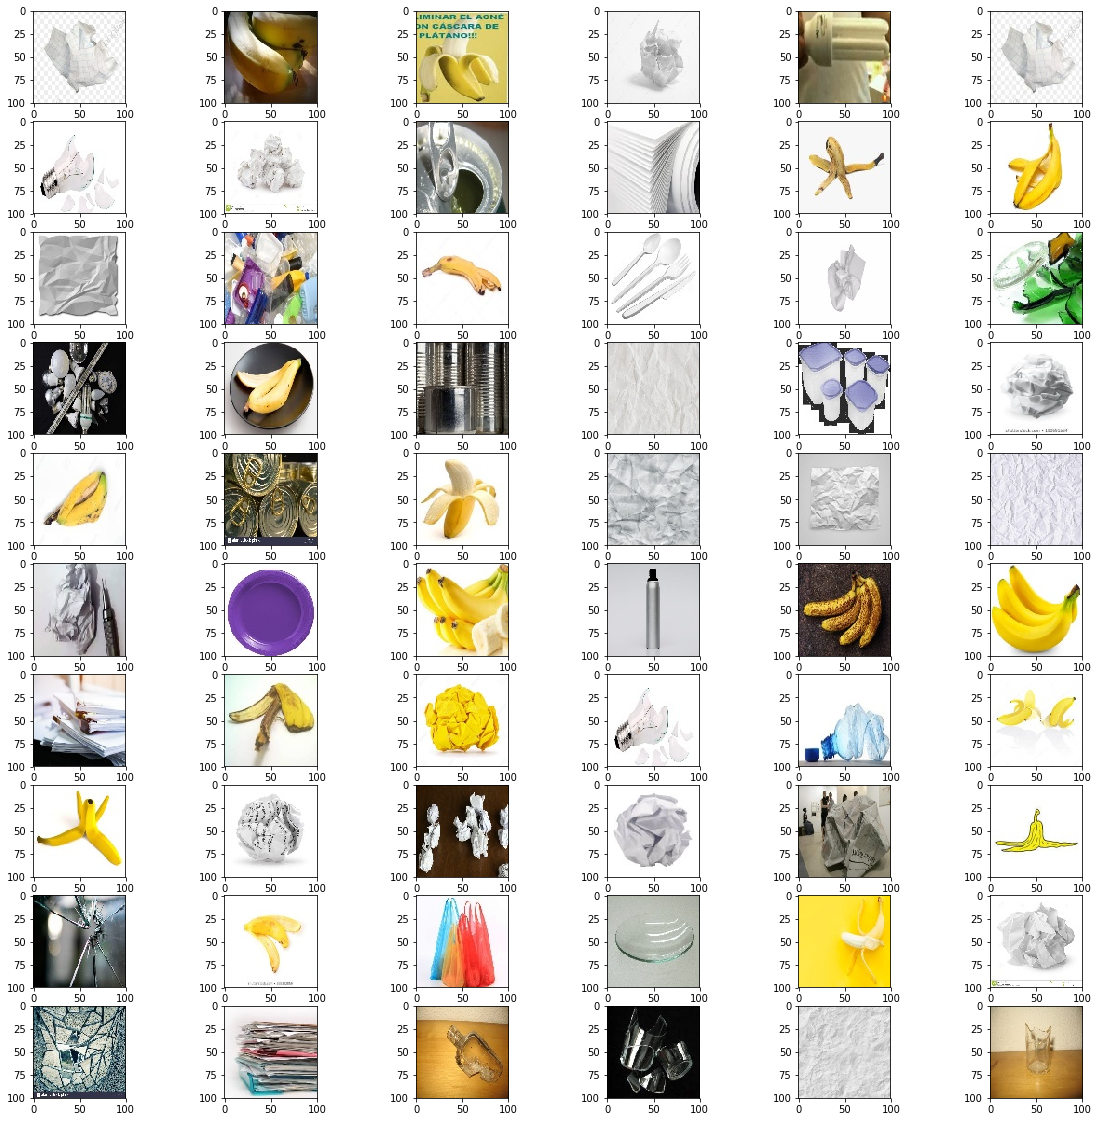

In [0]:
plt.figure(figsize=(20,20))
for i in range(1,61):
    path_image = path_imagenes+nombre_imagenes[i]
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
    plt.subplot(10,6,i)
    plt.imshow(img)

# Genera las X y Y

In [0]:
X=[]
Y=[]
for i,img_nombre in enumerate(nombre_imagenes):
    path_image = path_imagenes+img_nombre
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
    height, width, depth = img.shape
    X.append(img.reshape(height*width*depth))
    Y.append(nombre_imagenes[i][0])
X=np.array(X,dtype=int)
Y=np.array(Y,dtype=int)

In [0]:
n = int(len(X)*0.8)
tam=range(len(Y))
perm = np.random.permutation(len(tam))
X_train = X[perm[:n]]
Y_train = Y[perm[:n]]
X_test = X[perm[n:]]
Y_test = Y[perm[n:]]

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

GaussianNB()
('acierto en train', 0.61250000000000004)
('acierto en test ', 0.62777777777777777)

RandomForestClassifier(n_estimators=10)
('acierto en train', 0.98888888888888893)
('acierto en test ', 0.76111111111111107)

SVC(kernel='linear')
('acierto en train', 1.0)
('acierto en test ', 0.78888888888888886)

KNeighborsClassifier(n_neighbors=10)
('acierto en train', 0.66666666666666663)
('acierto en test ', 0.63888888888888884)



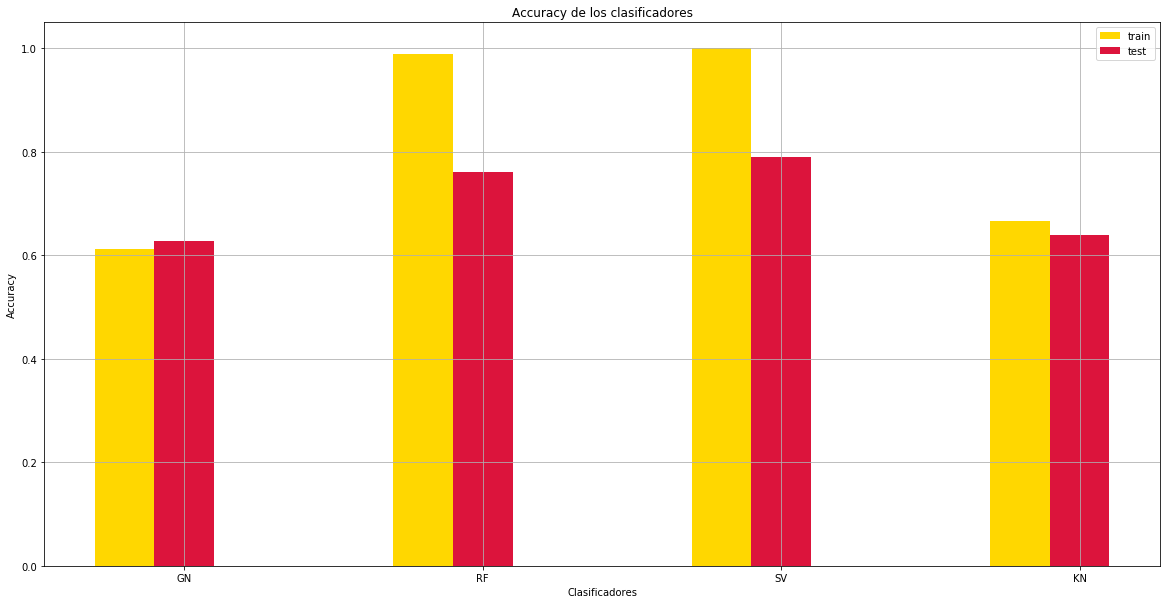

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

GN_est = GaussianNB()
RF_est = RandomForestClassifier(n_estimators=10)
SV_est = SVC(kernel='linear')
KN_est = KNeighborsClassifier(n_neighbors=10)

KN_train=[]
KN_test=[]
clas=[]
print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("GaussianNB()")
GN_est.fit(X_train, Y_train)
KN_train.append(GN_est.score(X_train, Y_train))
KN_test.append(GN_est.score(X_test, Y_test))
clas.append("GN")
print ("acierto en train", GN_est.score(X_train, Y_train))
print ("acierto en test ", GN_est.score(X_test, Y_test))
print ("")

print ("RandomForestClassifier(n_estimators=10)")
RF_est.fit(X_train, Y_train)
KN_train.append(RF_est.score(X_train, Y_train))
KN_test.append(RF_est.score(X_test, Y_test))
clas.append("RF")
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")

print ("SVC(kernel='linear')")
SV_est.fit(X_train, Y_train)
KN_train.append(SV_est.score(X_train, Y_train))
KN_test.append(SV_est.score(X_test, Y_test))
clas.append("SV")
print ("acierto en train", SV_est.score(X_train, Y_train))
print ("acierto en test ", SV_est.score(X_test, Y_test))
print ("")

print ("KNeighborsClassifier(n_neighbors=10)")
KN_est.fit(X_train, Y_train)
KN_train.append(KN_est.score(X_train, Y_train))
KN_test.append(KN_est.score(X_test, Y_test))
clas.append("KN")
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")

grafica(KN_train,KN_test,clas)

### RandomForestClassifier

El numero K con el mejor accuracy es: 21


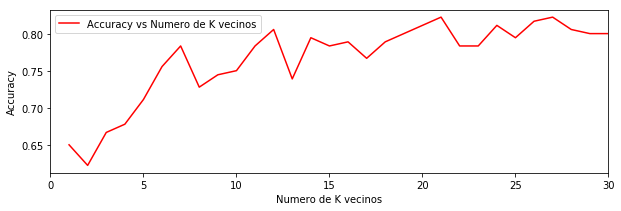

In [0]:
x=[]
y=[]
maxi=0;
for i in range(1,31):
    neigh = RandomForestClassifier(n_estimators=i)
    neigh.fit(X_train, Y_train)
    x.append(i)
    score=neigh.score(X_test,Y_test)
    y.append(score) 
    if score>maxi:
        maxi=score
        ma=i
print "El numero K con el mejor accuracy es:",ma
nf=ma
plt.figure(figsize=(10,3))
plt.plot(x,y, color="red",label="Accuracy vs Numero de K vecinos")
plt.xlabel("Numero de K vecinos")
plt.ylabel("Accuracy")
plt.xlim(0,30)
plt.legend()

### KNeighborsClassifier

El numero K con el mejor accuracy es: 1


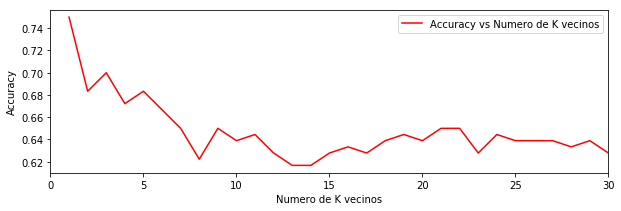

In [0]:
x=[]
y=[]
maxi=0;
for i in range(1,31):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    x.append(i)
    score=neigh.score(X_test,Y_test)
    y.append(score) 
    if score>maxi:
        maxi=score
        ma=i
print "El numero K con el mejor accuracy es:",ma
num=ma
plt.figure(figsize=(10,3))
plt.plot(x,y, color="red",label="Accuracy vs Numero de K vecinos")
plt.xlabel("Numero de K vecinos")
plt.ylabel("Accuracy")
plt.xlim(0,30)
plt.legend()

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

RandomForestClassifier(n_estimators=21)
('acierto en train', 0.99861111111111112)
('acierto en test ', 0.78888888888888886)

KNeighborsClassifier(n_neighbors=1)
('acierto en train', 1.0)
('acierto en test ', 0.75)



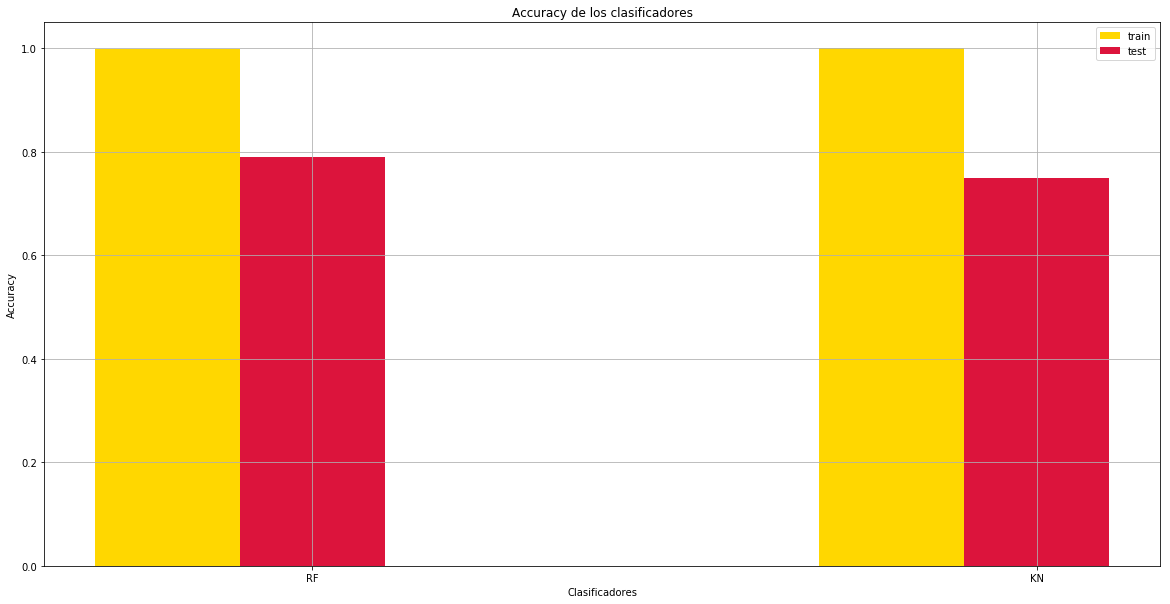

In [0]:
RF_est = RandomForestClassifier(n_estimators=nf)
KN_est = KNeighborsClassifier(n_neighbors=num)

train=[]
test=[]
clas=[]
print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("RandomForestClassifier(n_estimators="+str(nf)+")")
RF_est.fit(X_train, Y_train)
train.append(RF_est.score(X_train, Y_train))
RF_train=RF_est.score(X_train, Y_train)
test.append(RF_est.score(X_test, Y_test))
RF_test=RF_est.score(X_test, Y_test)
clas.append("RF")
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")


print ("KNeighborsClassifier(n_neighbors="+str(num)+")")
KN_est.fit(X_train, Y_train)
train.append(KN_est.score(X_train, Y_train))
KN_train=KN_est.score(X_train, Y_train)
test.append(KN_est.score(X_test, Y_test))
KN_test=KN_est.score(X_test, Y_test)
clas.append("KN")
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")
grafica(train,test,clas)

# Filtros

## GaussianBlur

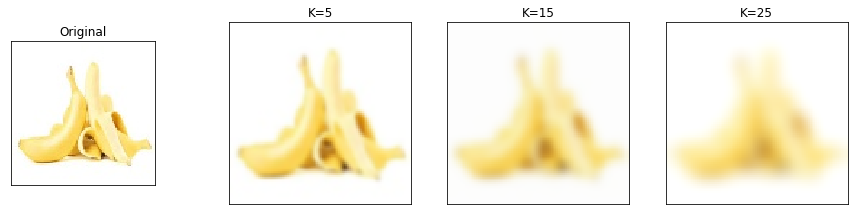

In [0]:
path_image = path_imagenes+nombre_imagenes[0]
img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)

blur_G5 = cv.GaussianBlur(img,(5,5),0)
blur_G15 = cv.GaussianBlur(img,(15,15),0)
blur_G25 = cv.GaussianBlur(img,(25,25),0)


plt.figure(figsize=(15,7))
plt.subplot(151),plt.imshow(img,'gray'),plt.title('Original'),plt.xticks([]),plt.yticks([]);
plt.subplot(142),plt.imshow(blur_G5,'gray'), plt.title('K=5'),plt.xticks([]), plt.yticks([]); 
plt.subplot(143), plt.imshow(blur_G15,'gray'), plt.title('K=15'),plt.xticks([]), plt.yticks([]);
plt.subplot(144), plt.imshow(blur_G25,'gray'), plt.title('K=25'),plt.xticks([]), plt.yticks([]);

In [0]:
X11, X12, X13=[],[],[]
Y=[]
k_x = np.array([[0,0,0],[-1,0,1],[0,0,0]], dtype=np.float32)
k_y = np.array([[0,-1,0],[0,0,0],[0,1,0]], dtype=np.float32)
for i,img_nombre in enumerate(nombre_imagenes):
    path_image = path_imagenes+img_nombre
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
    blur_G5 = cv.GaussianBlur(img,(5,5),0)
    blur_G15 = cv.GaussianBlur(img,(15,15),0)
    blur_G25 = cv.GaussianBlur(img,(25,25),0)
    height, width, depth = img.shape
    X11.append(blur_G5.reshape(height*width*depth))
    X12.append(blur_G15.reshape(height*width*depth))
    X13.append(blur_G25.reshape(height*width*depth))
    Y.append(nombre_imagenes[i][0])
X11=np.array(X11)
X12=np.array(X12)
X13=np.array(X13)
Y=np.array(Y,dtype=int)

### RandomForestClassifier

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

RF-1 GaussianBlur5
('acierto en train', 0.99583333333333335)
('acierto en test ', 0.80555555555555558)

RF-1 GaussianBlur15
('acierto en train', 0.99722222222222223)
('acierto en test ', 0.83333333333333337)

RF-1 GaussianBlur25
('acierto en train', 0.99722222222222223)
('acierto en test ', 0.80000000000000004)


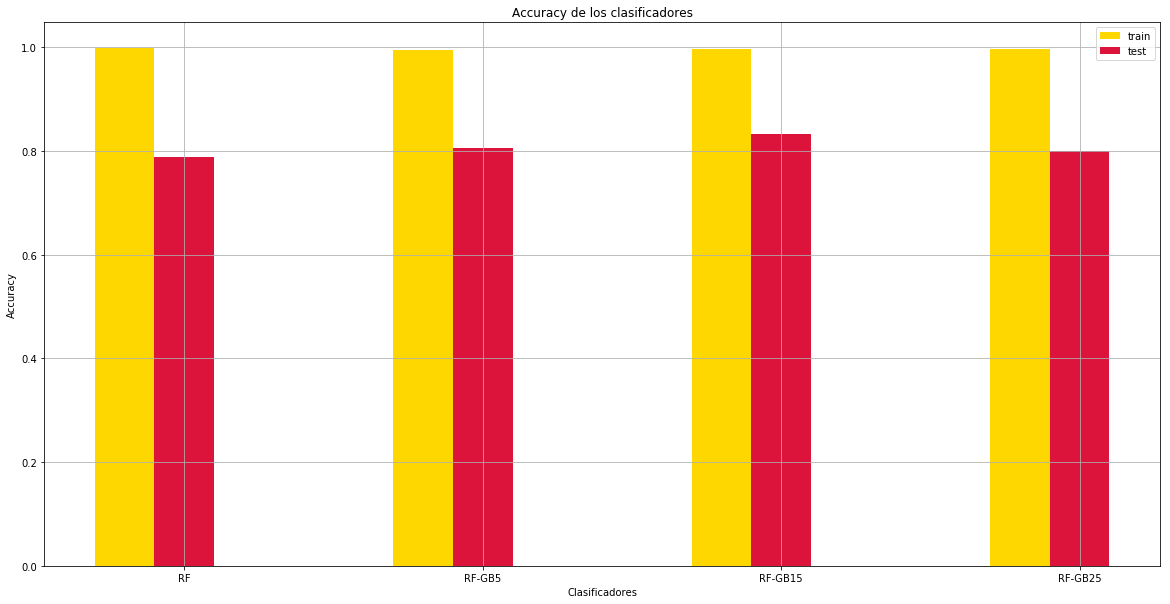

In [0]:
train=[RF_train]
test=[RF_test]
clas=["RF"]

Y_train = Y[perm[:n]]
Y_test = Y[perm[n:]]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X11[perm[:n]] 
X_test = X11[perm[n:]]
print ("RF-"+str(num)+" GaussianBlur5")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB5")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X12[perm[:n]] 
X_test = X12[perm[n:]]
print ("RF-"+str(num)+" GaussianBlur15")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB15")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X13[perm[:n]] 
X_test = X13[perm[n:]]
print ("RF-"+str(num)+" GaussianBlur25")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB25")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

grafica(train,test,clas)

### KNeighborsClassifier

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

KNN-1 GaussianBlur5
('acierto en train', 1.0)
('acierto en test ', 0.76666666666666672)

KNN-1 GaussianBlur15
('acierto en train', 1.0)
('acierto en test ', 0.76111111111111107)

KNN-1 GaussianBlur25
('acierto en train', 1.0)
('acierto en test ', 0.75555555555555554)


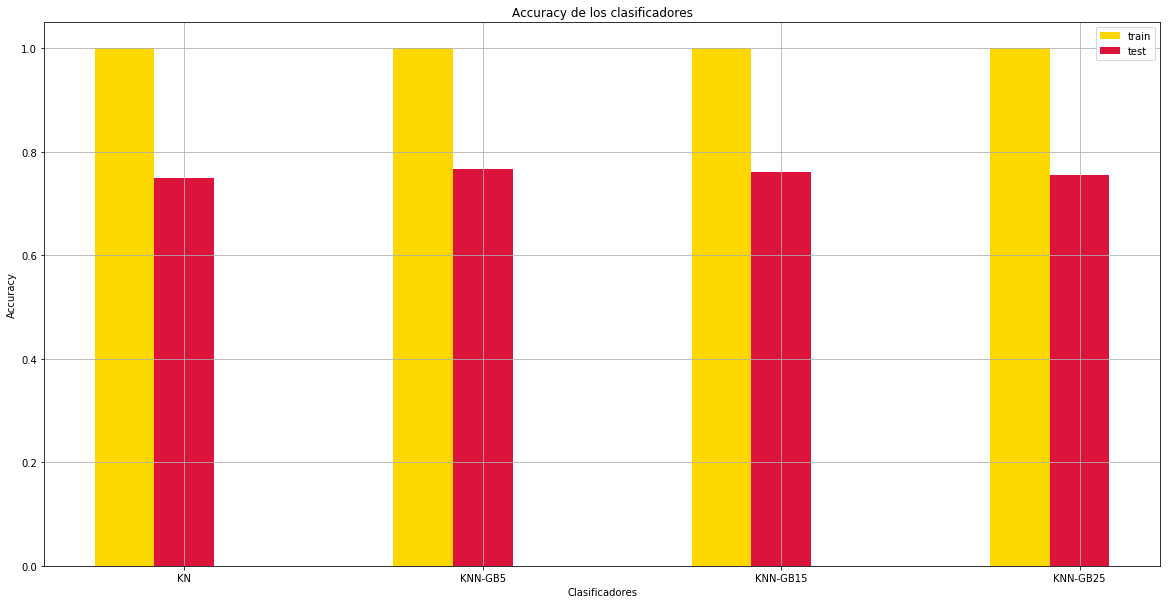

In [0]:
train=[KN_train]
test=[KN_test]
clas=["KN"]

Y_train = Y[perm[:n]]
Y_test = Y[perm[n:]]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X11[perm[:n]] 
X_test = X11[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlur5")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB5")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X12[perm[:n]] 
X_test = X12[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlur15")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB15")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X13[perm[:n]] 
X_test = X13[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlur25")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB25")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

grafica(train,test,clas)

## GaussianBlur Combinado 

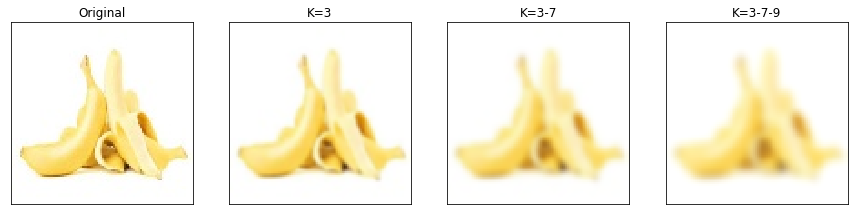

In [0]:
path_image = path_imagenes+nombre_imagenes[0]
img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)

blur_G3 = cv.GaussianBlur(img,(3,3),0)
blur_G37 = cv.GaussianBlur(blur_G3,(7,7),0)
blur_G379 = cv.GaussianBlur(blur_G37,(9,9),0)


plt.figure(figsize=(15,7))
plt.subplot(141),plt.imshow(img,'gray'),plt.title('Original'),plt.xticks([]),plt.yticks([]);
plt.subplot(142),plt.imshow(blur_G3,'gray'), plt.title('K=3'),plt.xticks([]), plt.yticks([]); 
plt.subplot(143), plt.imshow(blur_G37,'gray'), plt.title('K=3-7'),plt.xticks([]), plt.yticks([]);
plt.subplot(144), plt.imshow(blur_G379,'gray'), plt.title('K=3-7-9'),plt.xticks([]), plt.yticks([]);

In [0]:
X21, X22, X23=[],[],[]
Y=[]
for i,img_nombre in enumerate(nombre_imagenes):
    path_image = path_imagenes+img_nombre
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
    blur_G3 = cv.GaussianBlur(img,(3,3),0)
    blur_G37 = cv.GaussianBlur(blur_G3,(7,7),0)
    blur_G379 = cv.GaussianBlur(blur_G37,(9,9),0)
    height, width, depth = img.shape
    X21.append(blur_G3.reshape(height*width*depth))
    X22.append(blur_G37.reshape(height*width*depth))
    X23.append(blur_G379.reshape(height*width*depth))
    Y.append(nombre_imagenes[i][0])
X21=np.array(X21)
X22=np.array(X22)
X23=np.array(X23)
Y=np.array(Y,dtype=int)

### RandomForestClassifier

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

RF-1 GaussianBlur3
('acierto en train', 1.0)
('acierto en test ', 0.78333333333333333)

RF-1 GaussianBlur3-7
('acierto en train', 1.0)
('acierto en test ', 0.82777777777777772)

RF-1 GaussianBlur3-7-9
('acierto en train', 1.0)
('acierto en test ', 0.82777777777777772)


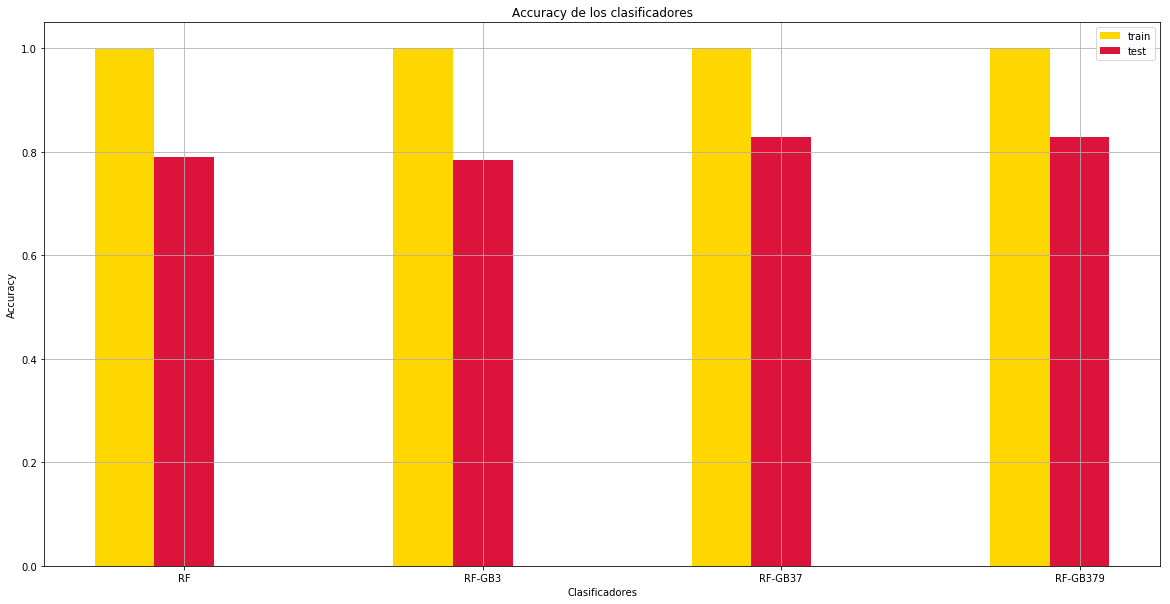

In [0]:
train=[RF_train]
test=[RF_test]
clas=["RF"]

Y_train = Y[perm[:n]]
Y_test = Y[perm[n:]]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X21[perm[:n]] 
X_test = X21[perm[n:]]
print ("RF-"+str(num)+" GaussianBlur3")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB3")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X22[perm[:n]] 
X_test = X22[perm[n:]]
print ("RF-"+str(num)+" GaussianBlur3-7")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB37")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X23[perm[:n]] 
X_test = X23[perm[n:]]
print ("RF-"+str(num)+" GaussianBlur3-7-9")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB379")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

grafica(train,test,clas)

### KNeighborsClassifier

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

KNN-1 GaussianBlur3
('acierto en train', 1.0)
('acierto en test ', 0.75)

KNN-1 GaussianBlur3-7
('acierto en train', 1.0)
('acierto en test ', 0.75555555555555554)

KNN-1 GaussianBlur3-7-9
('acierto en train', 1.0)
('acierto en test ', 0.76666666666666672)


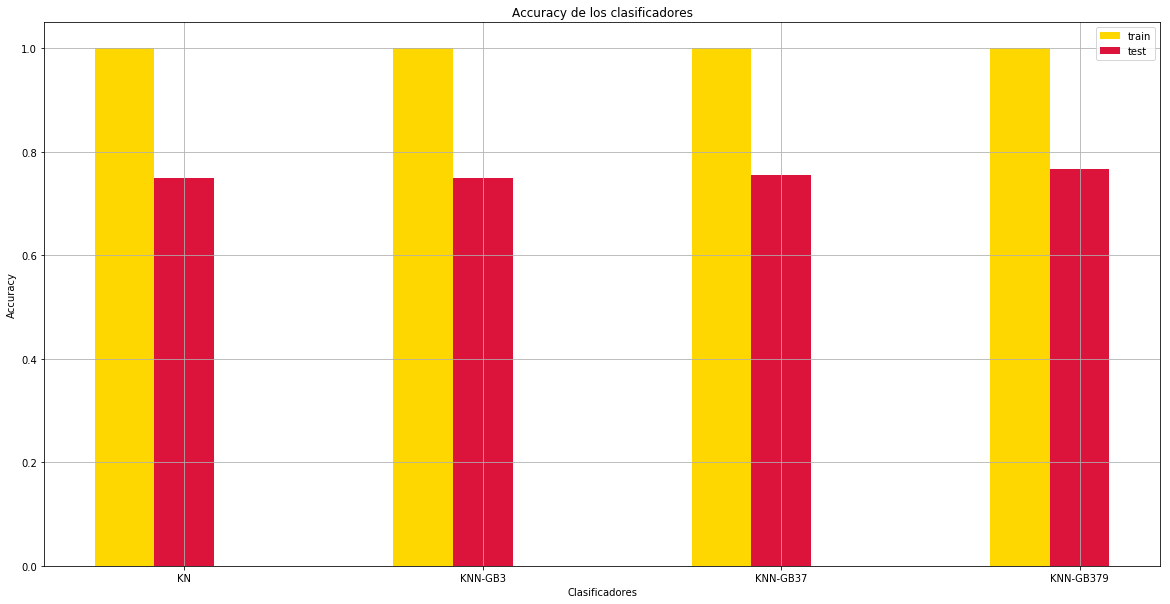

In [0]:
train=[KN_train]
test=[KN_test]
clas=["KN"]

Y_train = Y[perm[:n]]
Y_test = Y[perm[n:]]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X21[perm[:n]] 
X_test = X21[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlur3")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB3")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X22[perm[:n]] 
X_test = X22[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlur3-7")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB37")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X23[perm[:n]] 
X_test = X23[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlur3-7-9")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB379")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

grafica(train,test,clas)

## Sobel 

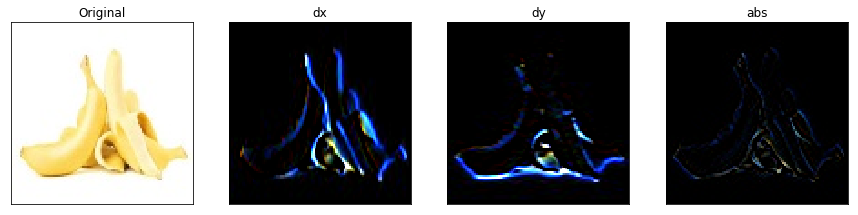

In [0]:
path_image = path_imagenes+nombre_imagenes[0]
img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)

ddepth = cv.CV_8U
scale = 1
delta = 0
grad_x = cv.Sobel(img, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(img, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_xy = cv.Sobel(img, ddepth, 1, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
plt.figure(figsize=(15,7))
plt.subplot(141),plt.imshow(img,'gray'),plt.title('Original'),plt.xticks([]),plt.yticks([]);
plt.subplot(142),plt.imshow(grad_x,'gray'), plt.title('dx'),plt.xticks([]), plt.yticks([]); 
plt.subplot(143), plt.imshow(grad_y,'gray'), plt.title('dy'),plt.xticks([]), plt.yticks([]);
plt.subplot(144), plt.imshow(grad_xy,'gray'), plt.title('abs'),plt.xticks([]), plt.yticks([]);


In [0]:
X31, X32, X33=[],[],[]
Y=[]
ddepth = cv.CV_8U
scale = 1
delta = 0
for i,img_nombre in enumerate(nombre_imagenes):
    path_image = path_imagenes+img_nombre
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
    grad_x = cv.Sobel(img, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(img, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_xy = cv.Sobel(img, ddepth, 1, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    height, width, depth = img.shape
    X31.append(grad_x.reshape(height*width*depth))
    X32.append(grad_y.reshape(height*width*depth))
    X33.append(grad_xy.reshape(height*width*depth))
    Y.append(nombre_imagenes[i][0])
X31=np.array(X31)
X32=np.array(X32)
X33=np.array(X33)
Y=np.array(Y,dtype=int)

### RandomForestClassifier

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

RF-1 Sobelx
('acierto en train', 0.99861111111111112)
('acierto en test ', 0.80000000000000004)

RF-1 Sobely
('acierto en train', 0.99722222222222223)
('acierto en test ', 0.82222222222222219)

RF-1 Sobelxy
('acierto en train', 0.99722222222222223)
('acierto en test ', 0.83888888888888891)


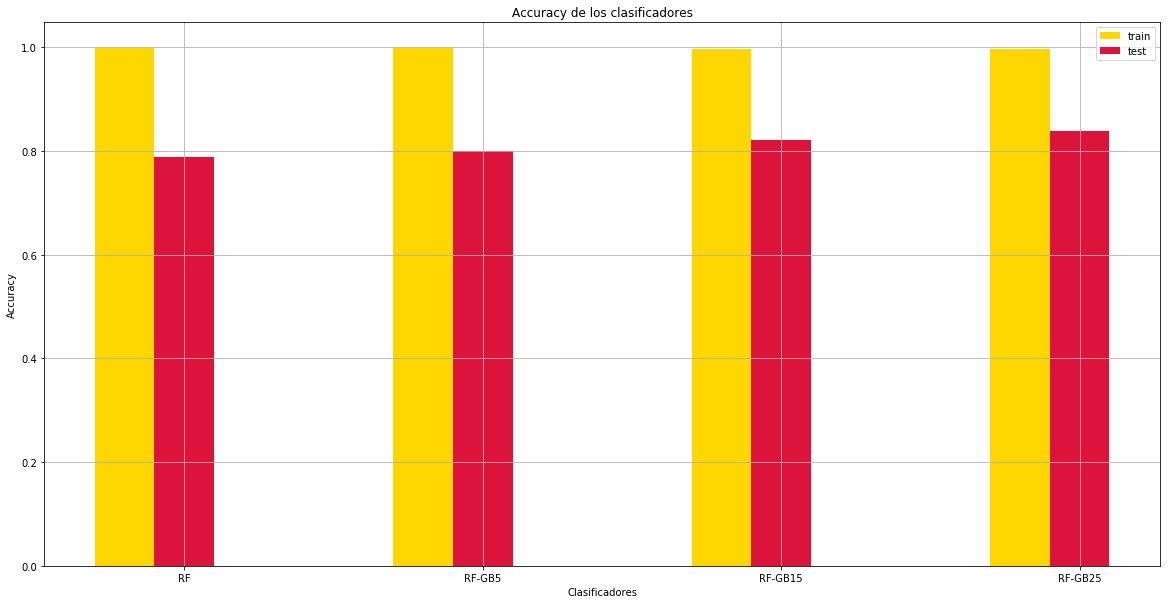

In [0]:
train=[RF_train]
test=[RF_test]
clas=["RF"]

Y_train = Y[perm[:n]]
Y_test = Y[perm[n:]]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X21[perm[:n]] 
X_test = X21[perm[n:]]
print ("RF-"+str(num)+" Sobelx")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB5")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X22[perm[:n]] 
X_test = X22[perm[n:]]
print ("RF-"+str(num)+" Sobely")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB15")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X23[perm[:n]] 
X_test = X23[perm[n:]]
print ("RF-"+str(num)+" Sobelxy")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB25")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

grafica(train,test,clas)

### KNeighborsClassifier

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

KNN-1 Sobelx
('acierto en train', 1.0)
('acierto en test ', 0.49444444444444446)

KNN-1 Sobely
('acierto en train', 1.0)
('acierto en test ', 0.43888888888888888)

KNN-1 Sobelxy
('acierto en train', 1.0)
('acierto en test ', 0.40000000000000002)


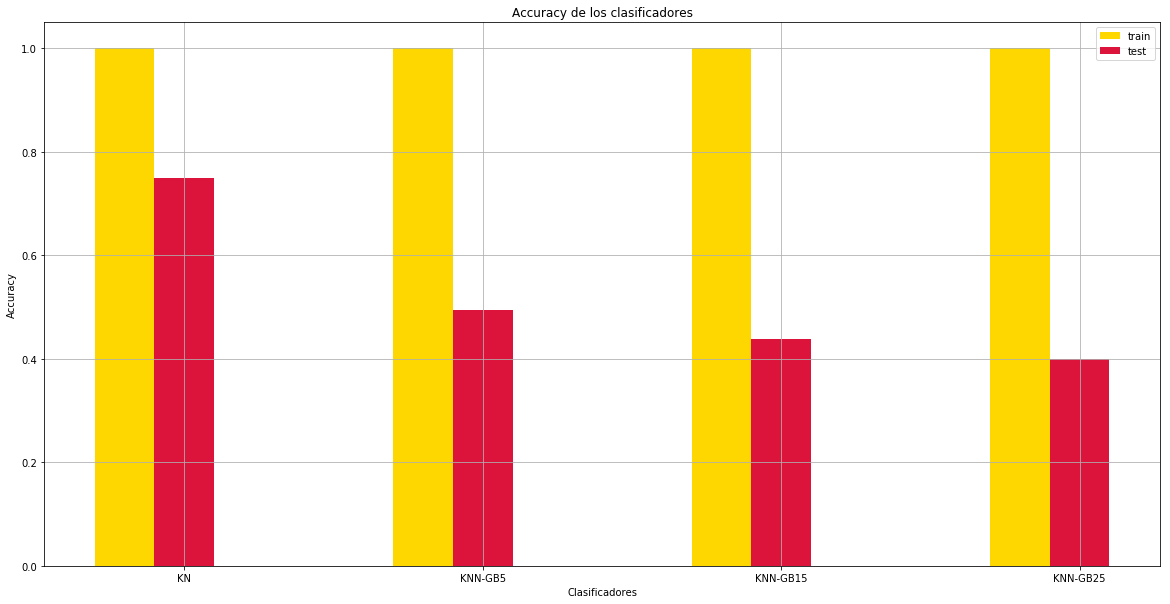

In [0]:
train=[KN_train]
test=[KN_test]
clas=["KN"]

Y_train = Y[perm[:n]]
Y_test = Y[perm[n:]]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X31[perm[:n]] 
X_test = X31[perm[n:]]
print ("KNN-"+str(num)+" Sobelx")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB5")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X32[perm[:n]] 
X_test = X32[perm[n:]]
print ("KNN-"+str(num)+" Sobely")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB15")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X33[perm[:n]] 
X_test = X33[perm[n:]]
print ("KNN-"+str(num)+" Sobelxy")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB25")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

grafica(train,test,clas)

## GaussianBlur Combinando con Sobel

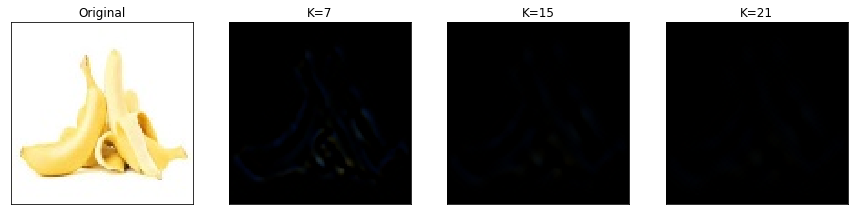

In [0]:
path_image = path_imagenes+nombre_imagenes[0]
img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)

ddepth = cv.CV_8U
scale = 1
delta = 0

blur_G7 = cv.GaussianBlur(img,(7,7),0)
G7_xy = cv.Sobel(blur_G7, ddepth, 1, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
blur_G15 = cv.GaussianBlur(img,(15,15),0)
G15_xy = cv.Sobel(blur_G15, ddepth, 1, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
blur_G21= cv.GaussianBlur(img,(21,21),0)
G21_xy = cv.Sobel(blur_G21, ddepth, 1, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)


plt.figure(figsize=(15,7))
plt.subplot(141),plt.imshow(img,'gray'),plt.title('Original'),plt.xticks([]),plt.yticks([]);
plt.subplot(142),plt.imshow(G7_xy,'gray'), plt.title('K=7'),plt.xticks([]), plt.yticks([]); 
plt.subplot(143), plt.imshow(G15_xy,'gray'), plt.title('K=15'),plt.xticks([]), plt.yticks([]);
plt.subplot(144), plt.imshow(G21_xy,'gray'), plt.title('K=21'),plt.xticks([]), plt.yticks([]);

In [0]:
X41, X42, X43=[],[],[]
Y=[]
ddepth = cv.CV_8U
scale = 1
delta = 0
for i,img_nombre in enumerate(nombre_imagenes):
    path_image = path_imagenes+img_nombre
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
    blur_G7 = cv.GaussianBlur(img,(7,7),0)
    G7_xy = cv.Sobel(blur_G7, ddepth, 1, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    blur_G15 = cv.GaussianBlur(img,(15,15),0)
    G15_xy = cv.Sobel(blur_G15, ddepth, 1, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    blur_G21= cv.GaussianBlur(img,(21,21),0)
    G21_xy = cv.Sobel(blur_G21, ddepth, 1, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    height, width, depth = img.shape
    X41.append(G7_xy.reshape(height*width*depth))
    X42.append(G15_xy.reshape(height*width*depth))
    X43.append(G21_xy.reshape(height*width*depth))
    Y.append(nombre_imagenes[i][0])
X41=np.array(X41)
X42=np.array(X42)
X43=np.array(X43)
Y=np.array(Y,dtype=int)

### RandomForestClassifier

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

RF-1 GaussianBlurSobelxy
('acierto en train', 1.0)
('acierto en test ', 0.56666666666666665)

RF-1 GaussianBlurSobelxy
('acierto en train', 1.0)
('acierto en test ', 0.6166666666666667)

RF-1 GaussianBlurSobelxy
('acierto en train', 1.0)
('acierto en test ', 0.6166666666666667)


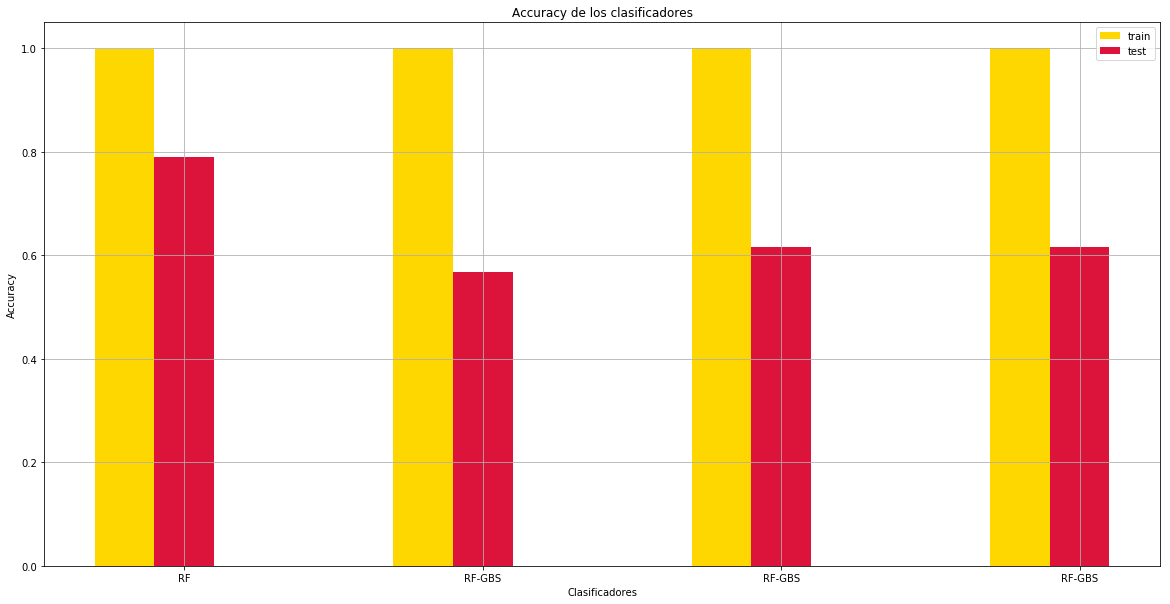

In [0]:
train=[RF_train]
test=[RF_test]
clas=["RF"]

Y_train = Y[perm[:n]]
Y_test = Y[perm[n:]]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X41[perm[:n]] 
X_test = X41[perm[n:]]
print ("RF-"+str(num)+" GaussianBlurSobelxy")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GBS")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X42[perm[:n]] 
X_test = X42[perm[n:]]
print ("RF-"+str(num)+" GaussianBlurSobelxy")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GBS")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X43[perm[:n]] 
X_test = X43[perm[n:]]
print ("RF-"+str(num)+" GaussianBlurSobelxy")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GBS")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

grafica(train,test,clas)

### KNeighborsClassifier

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

KNN-1 GaussianBlurSobelxy
('acierto en train', 1.0)
('acierto en test ', 0.42222222222222222)

KNN-1 GaussianBlurSobelxy
('acierto en train', 1.0)
('acierto en test ', 0.42777777777777776)

KNN-1 GaussianBlurSobelxy
('acierto en train', 1.0)
('acierto en test ', 0.48333333333333334)


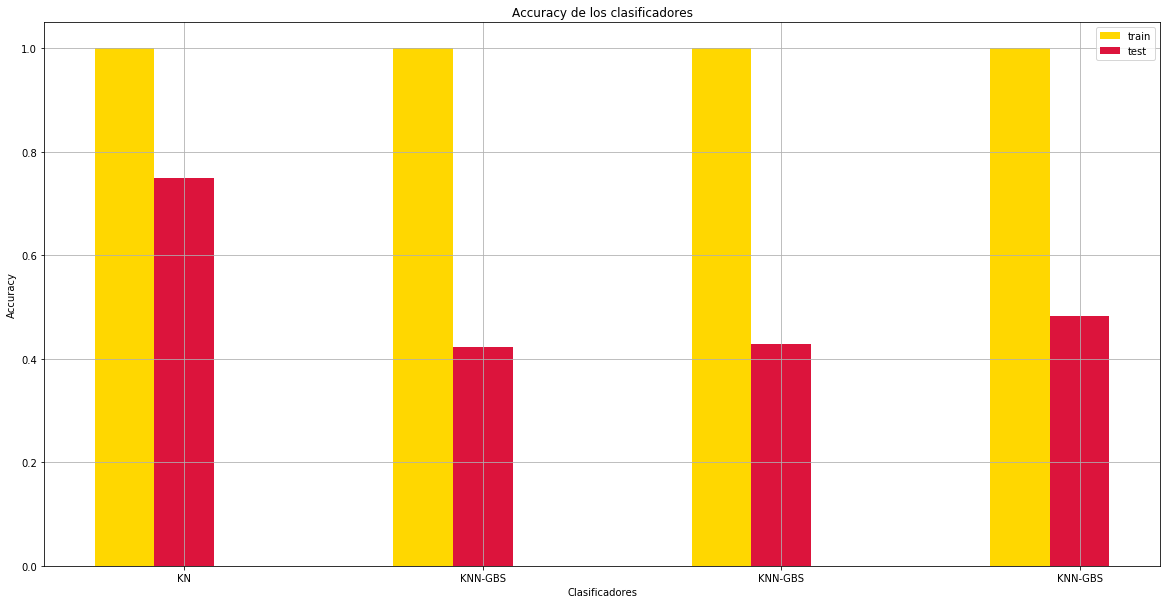

In [0]:
train=[KN_train]
test=[KN_test]
clas=["KN"]

Y_train = Y[perm[:n]]
Y_test = Y[perm[n:]]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X41[perm[:n]] 
X_test = X41[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlurSobelxy")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GBS")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X42[perm[:n]] 
X_test = X42[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlurSobelxy")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GBS")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X43[perm[:n]] 
X_test = X43[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlurSobelxy")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GBS")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

grafica(train,test,clas)

## Resultados finales 

In [0]:
X_train = X[perm[:n]]
Y_train = Y[perm[:n]]
X_test = X[perm[n:]]
Y_test = Y[perm[n:]]

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

RandomForestClassifier(n_estimators=21)
('acierto en train', 1.0)
('acierto en test ', 0.6333333333333333)

RF-1 GaussianBlur5
('acierto en train', 1.0)
('acierto en test ', 0.80000000000000004)

RF-1 GaussianBlur3-7
('acierto en train', 1.0)
('acierto en test ', 0.83888888888888891)

RF-1 Sobelx
('acierto en train', 1.0)
('acierto en test ', 0.55555555555555558)

RF-1 GaussianBlurSobelxy
('acierto en train', 1.0)
('acierto en test ', 0.62777777777777777)



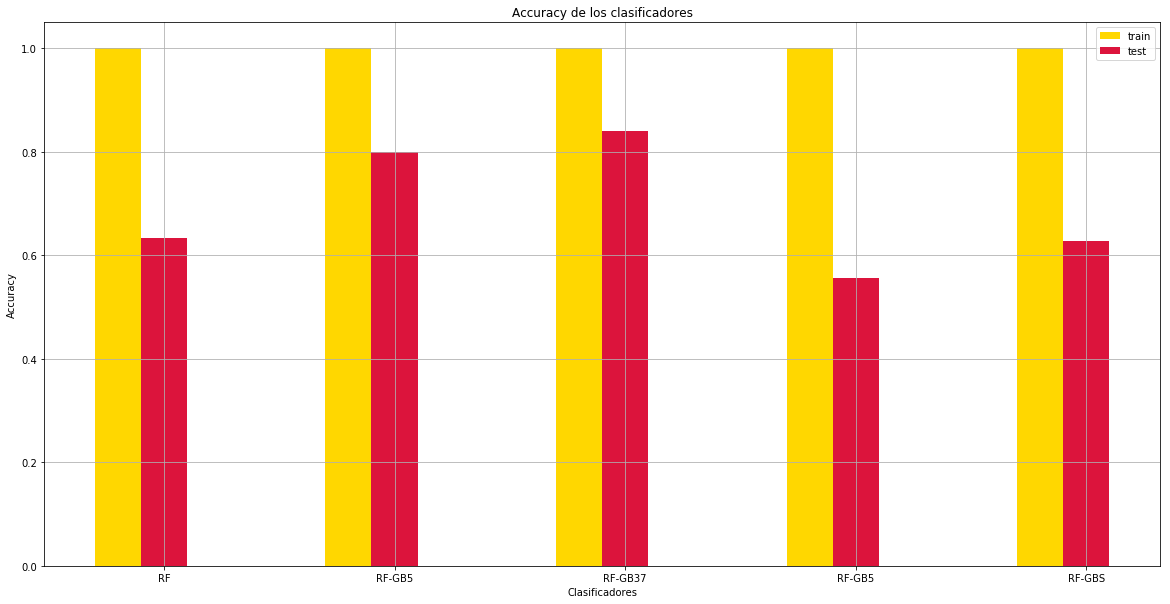

In [0]:
RF_est = RandomForestClassifier(n_estimators=nf)

Y_train = Y[perm[:n]]
Y_test = Y[perm[n:]]
train=[]
test=[]
clas=[]
print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("RandomForestClassifier(n_estimators="+str(nf)+")")
RF_est.fit(X_train, Y_train)
train.append(RF_est.score(X_train, Y_train))
RF_train=RF_est.score(X_train, Y_train)
test.append(RF_est.score(X_test, Y_test))
RF_test=RF_est.score(X_test, Y_test)
clas.append("RF")
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X12[perm[:n]] 
X_test = X12[perm[n:]]
print ("RF-"+str(num)+" GaussianBlur5")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB5")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X23[perm[:n]] 
X_test = X23[perm[n:]]
print ("RF-"+str(num)+" GaussianBlur3-7")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB37")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X33[perm[:n]] 
X_test = X33[perm[n:]]
print ("RF-"+str(num)+" Sobelx")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB5")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X42[perm[:n]] 
X_test = X42[perm[n:]]
print ("RF-"+str(num)+" GaussianBlurSobelxy")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GBS")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")
grafica(train,test,clas)

('dimensiones train', (720, 30000), (720,))
('dimsensions test ', (180, 30000), (180,))

KNeighborsClassifier(n_neighbors=1)
('acierto en train', 1.0)
('acierto en test ', 0.42777777777777776)

KNN-1 GaussianBlur25
('acierto en train', 1.0)
('acierto en test ', 0.76666666666666672)

KNN-1 GaussianBlur3
('acierto en train', 1.0)
('acierto en test ', 0.76666666666666672)

KNN-1 Sobelxy
('acierto en train', 1.0)
('acierto en test ', 0.49444444444444446)

KNN-1 GaussianBlurSobelxy
('acierto en train', 1.0)
('acierto en test ', 0.42777777777777776)


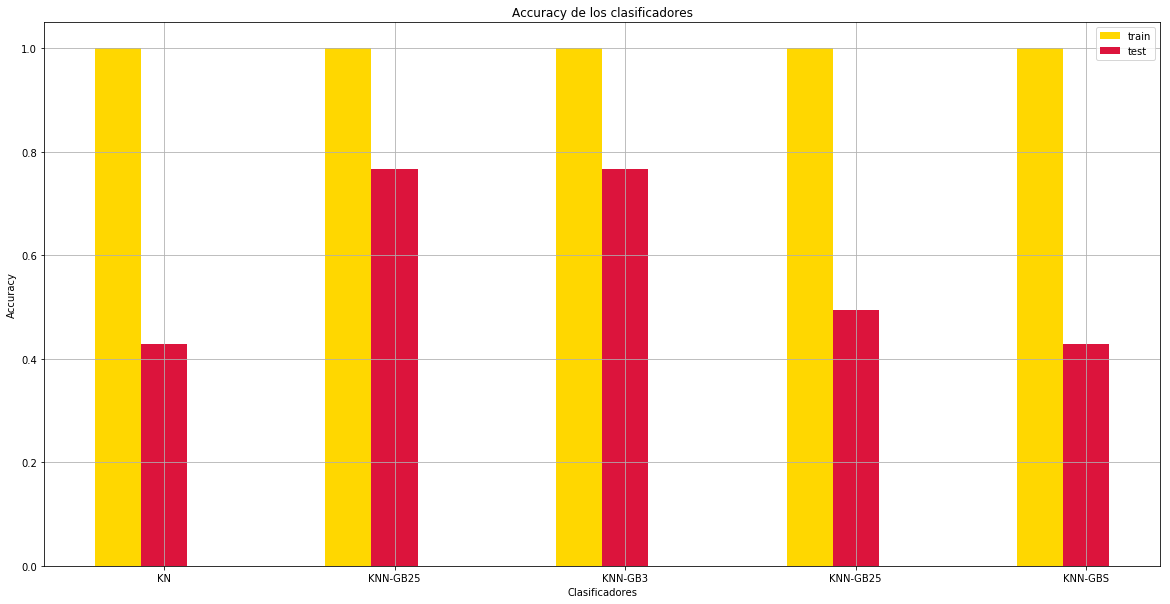

In [0]:
KN_est = KNeighborsClassifier(n_neighbors=num)

train=[]
test=[]
clas=[]
print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("KNeighborsClassifier(n_neighbors="+str(num)+")")
KN_est.fit(X_train, Y_train)
train.append(KN_est.score(X_train, Y_train))
KN_train=KN_est.score(X_train, Y_train)
test.append(KN_est.score(X_test, Y_test))
KN_test=KN_est.score(X_test, Y_test)
clas.append("KN")
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X11[perm[:n]] 
X_test = X11[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlur25")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB25")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X23[perm[:n]] 
X_test = X23[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlur3")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB3")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X31[perm[:n]] 
X_test = X31[perm[n:]]
print ("KNN-"+str(num)+" Sobelxy")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GB25")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = KNeighborsClassifier(n_neighbors=num)
X_train = X42[perm[:n]] 
X_test = X42[perm[n:]]
print ("KNN-"+str(num)+" GaussianBlurSobelxy")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KNN-GBS")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
grafica(train,test,clas)

# Bolsa de palabras

In [0]:
from skimage import io
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
import cv2 as cv
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)

In [0]:
path_imagenes = 'imagenes/'
nombre_imagenes = os.listdir(path_imagenes)
nombres=np.array(nombre_imagenes)
array_imgs_train=nombres[perm[:n]]
array_imgs_test=nombres[perm[n:]]

print array_imgs_train.shape, array_imgs_test.shape
print array_imgs_train.shape[0]+ array_imgs_test.shape[0]
print array_imgs_test[0]

(720,) (180,)
900
10248.jpg


In [0]:
import gc
array_ORB=[]
img =io.imread(path_imagenes+array_imgs_train[0])
descriptor_extractor = ORB(n_keypoints=200)
descriptor_extractor.detect_and_extract(rgb2gray(img))
array_ORB=descriptor_extractor.descriptors*1

for i in range(1,len(array_imgs_train)):
    img =io.imread(path_imagenes+array_imgs_train[i])
    descriptor_extractor = ORB(n_keypoints=200)
    descriptor_extractor.detect_and_extract(rgb2gray(img))
    array_ORB=np.concatenate((array_ORB,descriptor_extractor.descriptors*1))
    

array_ORB=np.array(array_ORB)

gc.collect() # explicitelly clean memory

print array_ORB.shape

(96407, 256)


In [0]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(array_ORB)

In [0]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [0]:
import gc

arr_h_train=[]
arr_h_test=[]
ya_train=[]
ya_test=[]

for i in range(len(array_imgs_train)):
    img =io.imread(path_imagenes+array_imgs_train[i])
    descriptor_extractor = ORB(n_keypoints=200)
    descriptor_extractor.detect_and_extract(rgb2gray(img))
    arr_h_train.append(build_histogram(descriptor_extractor.descriptors*1,kmeans))
    ya_train.append(array_imgs_train[i][0])

for i in range(len(array_imgs_test)):
    img =io.imread(path_imagenes+array_imgs_test[i])
    descriptor_extractor = ORB(n_keypoints=200)
    descriptor_extractor.detect_and_extract(rgb2gray(img))
    arr_h_test.append(build_histogram(descriptor_extractor.descriptors*1,kmeans))
    ya_test.append(array_imgs_test[i][0])
    
arr_h_train=np.array(arr_h_train)
arr_h_test=np.array(arr_h_test)
ya_train=np.array(ya_train)
ya_test=np.array(ya_test)

print arr_h_train.shape, arr_h_test.shape, ya_train.shape, ya_test.shape

(720, 10) (180, 10) (720,) (180,)


In [0]:
X_train=arr_h_train
Y_train=ya_train
X_test=arr_h_test
Y_test=ya_test

('dimensiones train', (720, 10), (720,))
('dimsensions test ', (180, 10), (180,))

RF-1 BoW
('acierto en train', 0.99722222222222223)
('acierto en test ', 0.57222222222222219)


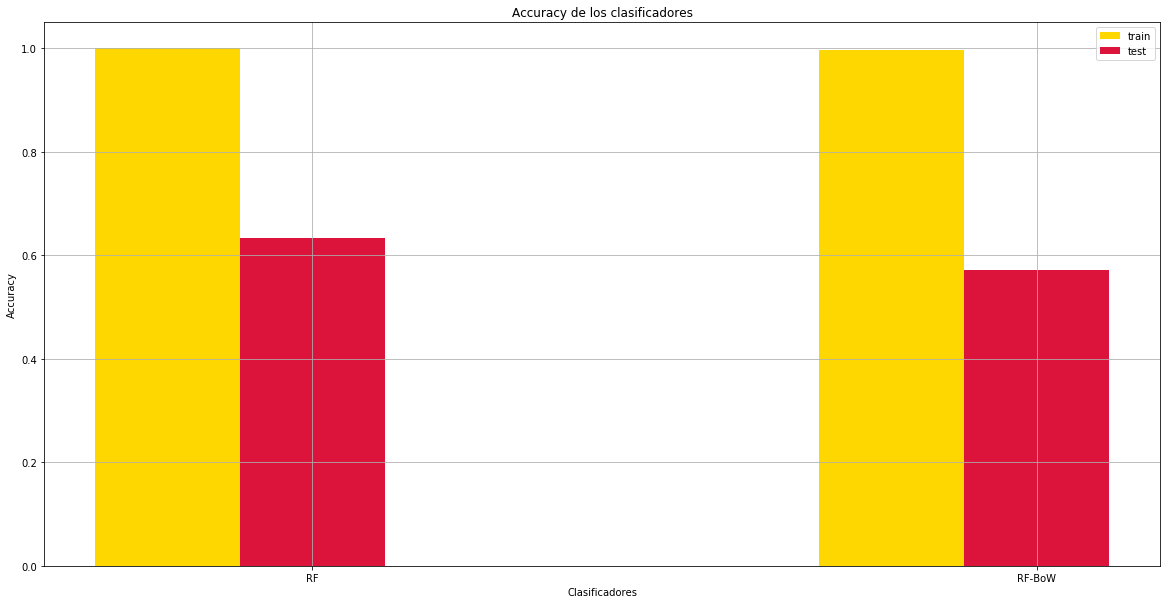

In [0]:
train=[RF_train]
test=[RF_test]
clas=["RF"]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")


est = RandomForestClassifier(n_estimators=nf)
print ("RF-"+str(num)+" BoW")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-BoW")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

grafica(train,test,clas)

('dimensiones train', (720, 10), (720,))
('dimsensions test ', (180, 10), (180,))

KN-1 BoW
('acierto en train', 1.0)
('acierto en test ', 0.58333333333333337)


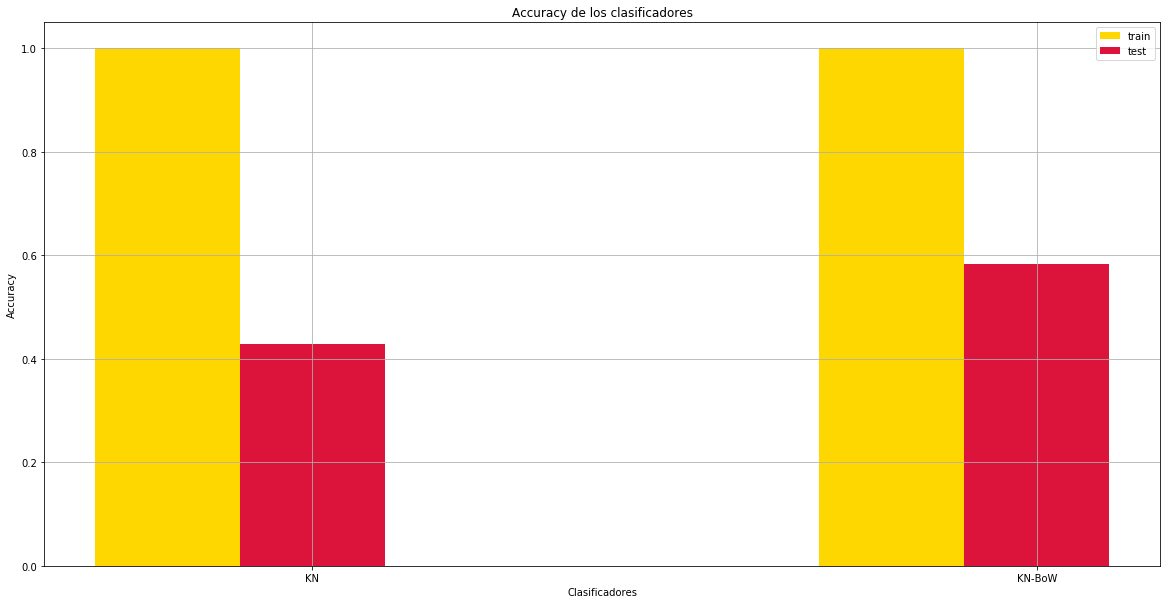

In [0]:
train=[KN_train]
test=[KN_test]
clas=["KN"]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")


est = KNeighborsClassifier(n_neighbors=num)
print ("KN-"+str(num)+" BoW")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("KN-BoW")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
grafica(train,test,clas)

## Red Neuronal

In [0]:
x=[]
y=[]

im_names = os.listdir("imagenes/")
url="imagenes/"
for im_name in im_names:
    path_image = url+im_name
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_BGR2RGB)
    x.append(img)
    y.append(im_name[0])
x=np.array(x)
y=np.array(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [0]:
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=[100, 100, 3]),
    keras.layers.Dense(512, activation=tf.nn.swish),
    keras.layers.Dense(256, activation=tf.nn.swish),
    keras.layers.Dense(128, activation=tf.nn.swish),
    keras.layers.Dense(64, activation=tf.nn.swish),
    keras.layers.Dense(32, activation=tf.nn.swish),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [0]:
model.summary()

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, batch_size=75, epochs=100, verbose=1, validation_data=(X_test, Y_test))

In [0]:
test_loss, test_acc = model_DNN1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

In [0]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)),
    keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(12000, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(4800, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(1920, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(768, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(306, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(48, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.summary()

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, batch_size=75, epochs=100, verbose=1, validation_data=(x_test, y_test))

In [0]:
test_loss, test_acc = model_DNN1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)